# CNN

In [9]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load Data

In [10]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Prepare the Data

In [11]:
# - 1: egal wie viel 
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0


In [12]:
# one hot encoding 
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Build the model

In [13]:
model = Sequential()

# CONV1
model.add(Conv2D( 32  ,  kernel_size=(3,3), activation= "relu" , input_shape = (28,28, 1))) # 1: one channel
model.add(MaxPooling2D(pool_size=(2, 2)))


# CONV2
model.add(Conv2D( 64  ,  kernel_size=(3,3), activation= "relu" )) # 1: one channel
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convert the two to 1D
model.add(Flatten())

# Build the NN 
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(10, activation="softmax")) # output


c:\Python\Python3125\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compile / Config

In [14]:
model.compile(optimizer = Adam(learning_rate=0.001) , loss = "categorical_crossentropy", metrics = ["accuracy"])

# Train the model

In [15]:
history = model.fit(x_train, y_train, epochs= 10, batch_size= 128,   validation_split= 0.1)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 42s 78ms/step - accuracy: 0.7955 - loss: 0.6581 - val_accuracy: 0.9817 - val_loss: 0.0610
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 33s 77ms/step - accuracy: 0.9683 - loss: 0.1081 - val_accuracy: 0.9878 - val_loss: 0.0450
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 43s 101ms/step - accuracy: 0.9769 - loss: 0.0743 - val_accuracy: 0.9890 - val_loss: 0.0359
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 42s 98ms/step - accuracy: 0.9824 - loss: 0.0604 - val_accuracy: 0.9888 - val_loss: 0.0358
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 33s 78ms/step - accuracy: 0.9851 - loss: 0.0487 - val_accuracy: 0.9895 - val_loss: 0.0372
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 31s 73ms/step - accuracy: 0.9875 - loss: 0.0420 - val_accuracy: 0.9920 - val_loss: 0.0348
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 31s 72ms/step - accuracy: 0.9883 - loss: 0.0378 - val_accuracy: 0.9917 - val_loss: 0.0326
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 31s 73ms/step - accuracy: 0.9901 - loss: 0.0317 -

# Plot the aacuracy

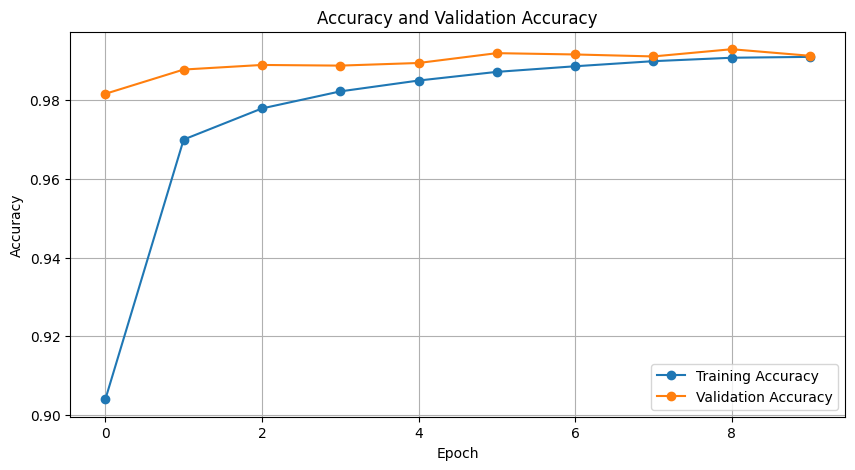

In [16]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Accuracy and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()